# <center>Capstone Project 1 - 'Credit Card Approval Prediction' </center>

## <center><u> Index - Notebook 1 </u></center>

#### 1. Data Cleaning and Preprocessing
       1.1 Renaming columns
       1.2 Handling Missing Values

#### 2. EDA (Exploratory Data Analysis)
       2.1 Distribution of Categorical Features 
       2.2 Distribution of Numerical Features 
       2.3 Visualization on the Hypothesis (1,2,3)

#### 3. Handling Outliers

#### 4. Feature Engineering (Numerical features)
       4.1 Converting 'Birthday_count' column into 'Birthdate' and 'Age'
       4.2 Converting 'Employed_days' column into 'Employment_startdate' and 'Employed_Years' 
       4.3 Binning and Discretization 
       4.4 Removing outliers of newly created columns 'Employed_Years' & 'Age'
       4.5 EDA on 'Age_Category'column
       4.6 Plotting the Hypothesis(4)

#### 5. Correlation 
       5.1 Pearson Correlation Coefficient 
          5.1.1 Plotting correlation matrix Using HeatMap
       5.2 Justifying Hypothesis with p_values

#### 6. Feature Engineering (Categorical features)
       6.1 Combining Categories 
       6.2 Encoding Categorical Features Using LabelEncoder

#### 7. Association Using Chi_squared Test

#### 8. Z-Test 

#### 9. Feature Selection 
       9.1 RFE (Recursive Feature Elimination) 
       9.2 Feature Importance with Random Forest Classifier


In [4]:
# Import necessary libraries
import pandas as pd  # Data manipulation using DataFrames
import numpy as np   # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting library
from datetime import datetime, timedelta  # Date and time manipulation
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables
from scipy.stats import pearsonr  # For Pearson's correlation coefficient
from scipy.stats import chi2_contingency  # For chi-squared tests
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.feature_selection import RFE  # Recursive Feature Elimination
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from statsmodels.stats.proportion import proportions_ztest # Z-test
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Data Cleaning and Preprocessing		

In [5]:
# Loading Credit Card data and labels from CSV files
Credit_card_data = pd.read_csv('Credit_card.csv')
Credit_card_label_data = pd.read_csv('Credit_card_label.csv')

In [6]:
# Checking the shape before merging it
print(Credit_card_data.shape)
print(Credit_card_label_data.shape)

(1548, 18)
(1548, 2)


In [7]:
# Merging the Credit Card data with the labels using an inner join to only keep rows with matching 'Ind_ID'
Credit_data = pd.merge(Credit_card_data, Credit_card_label_data, on='Ind_ID', how='inner')

In [8]:
# Displaying the shape of the merged Credit Data DataFrame
print(Credit_data.shape)

(1548, 19)


In [9]:
# Displaying statistics of the Credit_data using describe()  
Credit_data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [10]:
# Checking column's data type with the help of info() 
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

## 1.1 Renaming columns

In [11]:
# Renaming the 'GENDER' column to 'Gender' in the Credit Data DataFrame
Credit_data.rename(columns={'GENDER': 'Gender'}, inplace=True)

# Renaming the 'CHILDREN' column to 'Children' in the Credit Data DataFrame
Credit_data.rename(columns={'CHILDREN': 'Children'}, inplace=True)

# Renaming the 'EDUCATION' column to 'Education' in the Credit Data DataFrame
Credit_data.rename(columns={'EDUCATION': 'Education'}, inplace=True)

# Renaming the 'EMAIL_ID' column to 'Email_ID' in the Credit Data DataFrame
Credit_data.rename(columns={'EMAIL_ID': 'Email_ID'}, inplace=True)

# Renaming the 'label' column to 'Label' in the Credit Data DataFrame
Credit_data.rename(columns={'label': 'Label'}, inplace=True)

In [12]:
# Dropping irrelevant columns
columns_to_drop = ['Mobile_phone', 'Work_Phone', 'Phone', 'Email_ID']

# Dropping the specified columns from the Credit Data DataFrame
Credit_data = Credit_data.drop(columns=columns_to_drop, axis=1)

In [13]:
# Map 1 to 'Approved' and 0 to 'Rejected'
Credit_data['Label'] = Credit_data['Label'].map({0: 'Approved', 1: 'Rejected'})

## 1.2 Handling Missing Values

In [14]:
# Calculating the percentage of missing values for each column
missing_percentage = (Credit_data.isnull().sum() / len(Credit_data)) * 100

# Rounding the missing percentage to 2 decimal places for better readability
missing_percentage.round(2)

Ind_ID              0.00
Gender              0.45
Car_Owner           0.00
Propert_Owner       0.00
Children            0.00
Annual_income       1.49
Type_Income         0.00
Education           0.00
Marital_status      0.00
Housing_type        0.00
Birthday_count      1.42
Employed_days       0.00
Type_Occupation    31.52
Family_Members      0.00
Label               0.00
dtype: float64

- Dropping the 'Type_Occupation' column due to a significant number of null values (31.52%) and the column not seeming relevant for credit card prediction.

In [15]:
Credit_data.drop('Type_Occupation', axis=1, inplace=True)

- Creating a cleaned version of the Credit Data DataFrame by dropping rows with 2% missing values ('Annual_income' and 'Birthday_count')

In [16]:
Credit_data_cleaned = Credit_data.dropna()

In [15]:
missing_percentage = (Credit_data_cleaned.isnull().sum() / len(Credit_data_cleaned)) * 100
missing_percentage.round(2)

Ind_ID            0.0
Gender            0.0
Car_Owner         0.0
Propert_Owner     0.0
Children          0.0
Annual_income     0.0
Type_Income       0.0
Education         0.0
Marital_status    0.0
Housing_type      0.0
Birthday_count    0.0
Employed_days     0.0
Family_Members    0.0
Label             0.0
dtype: float64

# 2. EDA (Exploratory Data Analysis)

## 2.1  Distribution of Categorical Features 

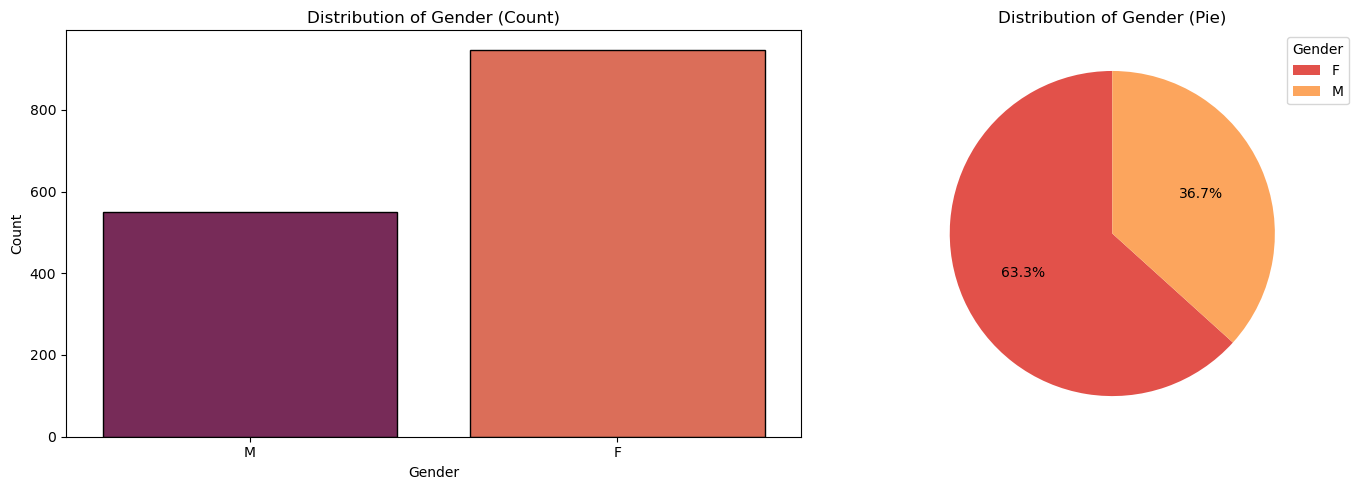

In [17]:
# Gender Distribution - Count plot and Pie chart
fig, axes = plt.subplots(1, 2, figsize=(15, 5))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Gender', data=Credit_data_cleaned, ax=axes[0], palette = 'rocket',edgecolor='black')
axes[0].set_title('Distribution of Gender (Count)')

# Plotting Pie chart
Gender_counts = Credit_data_cleaned['Gender'].value_counts()
wedges, _, autotexts = axes[1].pie(Gender_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Spectral'))

# Adding legend to the pie chart
axes[1].legend(wedges, Gender_counts.index, title='Gender', loc='upper right',bbox_to_anchor=(0.7, 0.5, 0.4, 0.5))
axes[1].set_title('Distribution of Gender (Pie)')

# Adding Labels and Adjusting layout
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
plt.tight_layout()
plt.show()

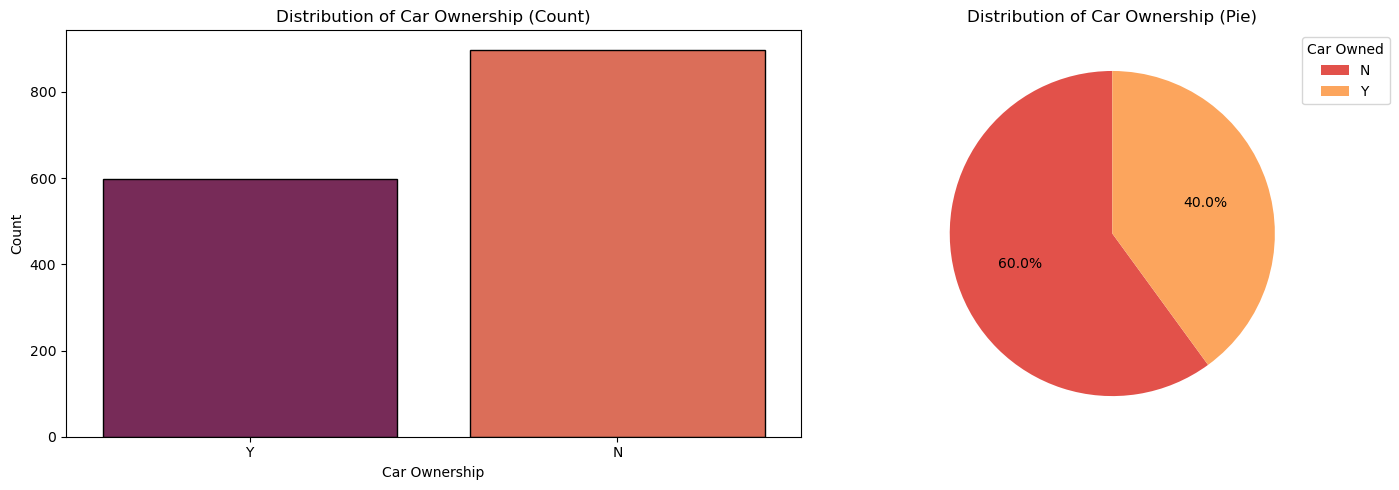

In [17]:
# Car Owner Distribution - Count plot and Pie chart
fig, axes = plt.subplots(1, 2, figsize=(15, 5))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Car_Owner', data=Credit_data_cleaned, ax=axes[0], palette = 'rocket',edgecolor='black')
axes[0].set_title('Distribution of Car Ownership (Count)')

# Plotting Pie chart
car_owner_counts = Credit_data_cleaned['Car_Owner'].value_counts()
wedges, _, autotexts = axes[1].pie(car_owner_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Spectral'))

# Adding legend to the pie chart
axes[1].legend(wedges, car_owner_counts.index, title='Car Owned', loc='upper right',bbox_to_anchor=(0.8, 0.5, 0.4, 0.5))
axes[1].set_title('Distribution of Car Ownership (Pie)')

# Adding Labels and Adjusting layout
axes[0].set_xlabel('Car Ownership')
axes[0].set_ylabel('Count')
plt.tight_layout()
plt.show()


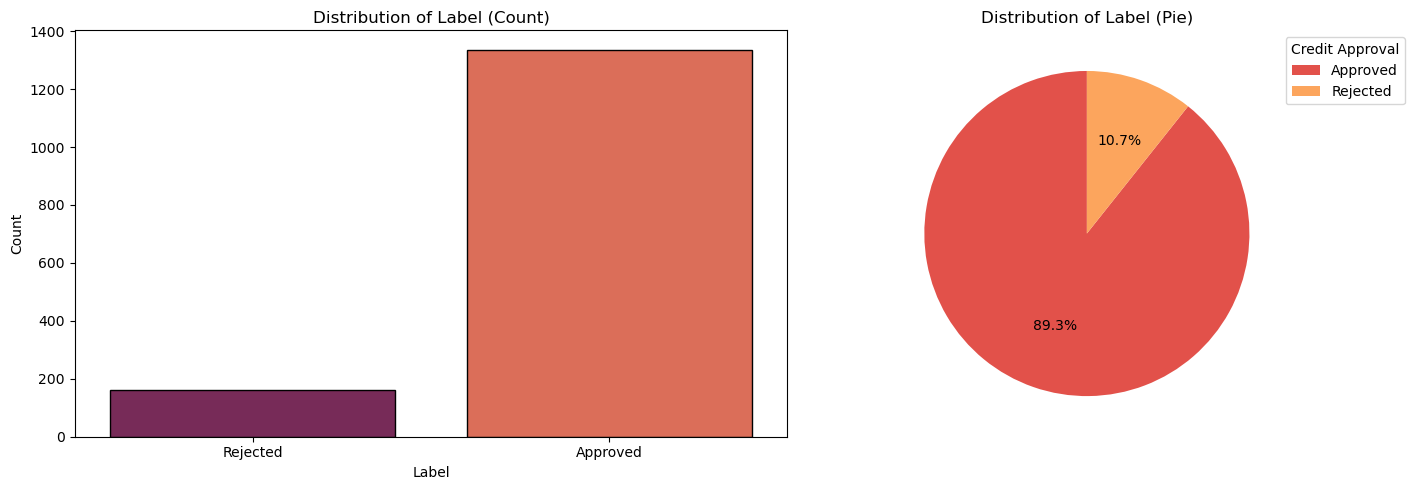

In [18]:
# Label Distribution - Count plot and Pie chart
fig, axes = plt.subplots(1, 2, figsize=(15, 5))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Label', data=Credit_data_cleaned, ax=axes[0], palette='rocket',edgecolor='black')
axes[0].set_title('Distribution of Label (Count)')

# Plotting Pie chart
label_counts = Credit_data_cleaned['Label'].value_counts()
wedges, _, autotexts = axes[1].pie(label_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Spectral'))

# Adding legend to the pie chart
axes[1].legend(wedges, label_counts.index, title='Credit Approval', loc='upper right',bbox_to_anchor=(0.9, 0.5, 0.4, 0.5))
axes[1].set_title('Distribution of Label (Pie)')

# Adding Labels and Adjusting layout
plt.tight_layout()
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
plt.show()


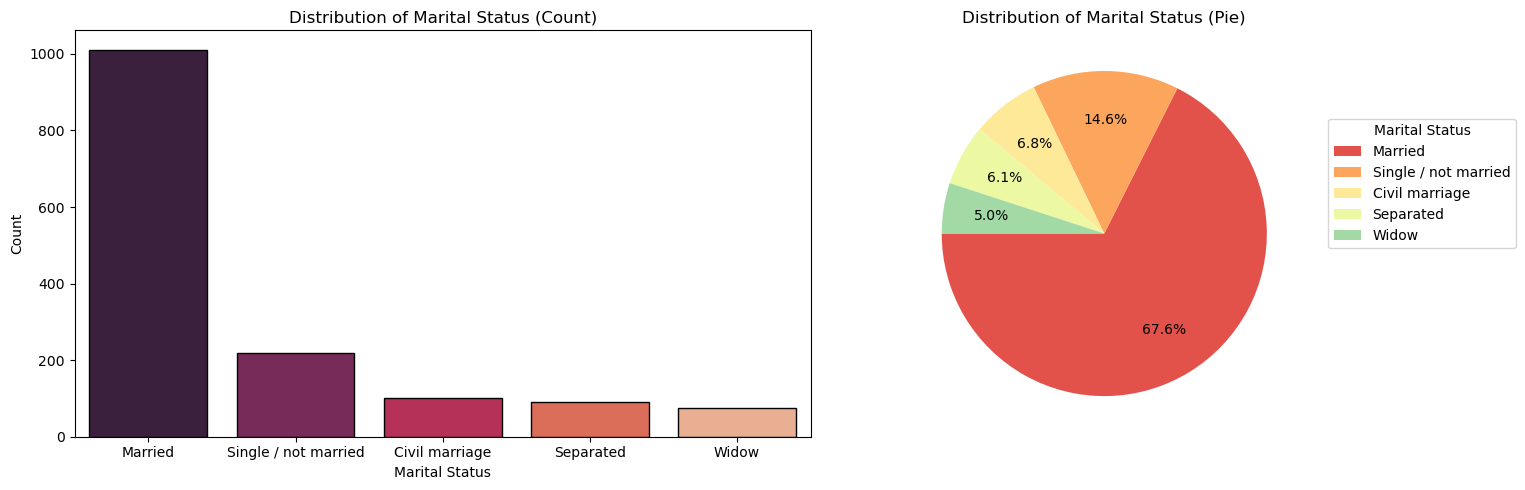

In [19]:
# Marital Status Distribution - Count plot and Pie chart
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting Count plot
sns.countplot(x='Marital_status', data=Credit_data_cleaned, ax=axes[0], palette='rocket',edgecolor='black')
axes[0].set_title('Distribution of Marital Status (Count)')

# Plotting Pie chart
Marital_status_counts = Credit_data_cleaned['Marital_status'].value_counts()
wedges, _, autotexts = axes[1].pie(Marital_status_counts, autopct='%1.1f%%', startangle=180,pctdistance = 0.7, colors=sns.color_palette('Spectral'))

# Adding legend to the pie chart
axes[1].legend(wedges, Marital_status_counts.index, title='Marital Status', loc='upper right',bbox_to_anchor=(1.13, 0.5, 0.4, 0.3))
axes[1].set_title('Distribution of Marital Status (Pie)')

# Adding Labels and Adjusting layout
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')
plt.tight_layout()
plt.show()


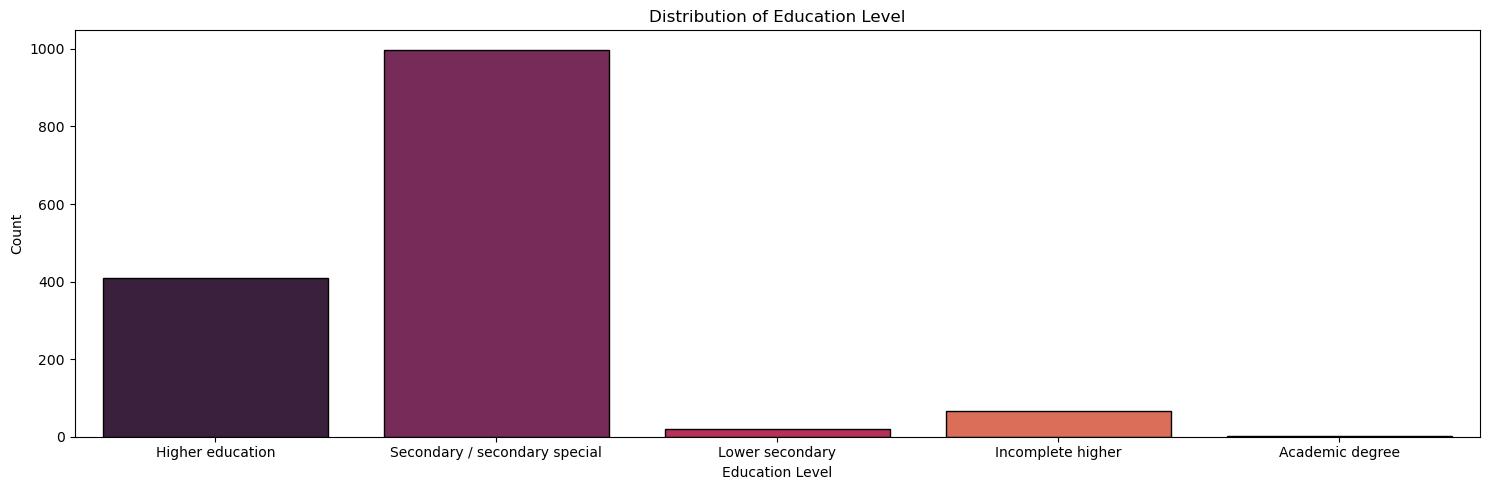

In [20]:
# Education Level Distribution
plt.figure(figsize=(15, 5))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Education', data=Credit_data_cleaned, palette='rocket',edgecolor='black')

# Adding title to the plot
plt.title('Distribution of Education Level')

# Adding Labels and Adjusting layout
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2.1 Distribution of for Numerical Features 

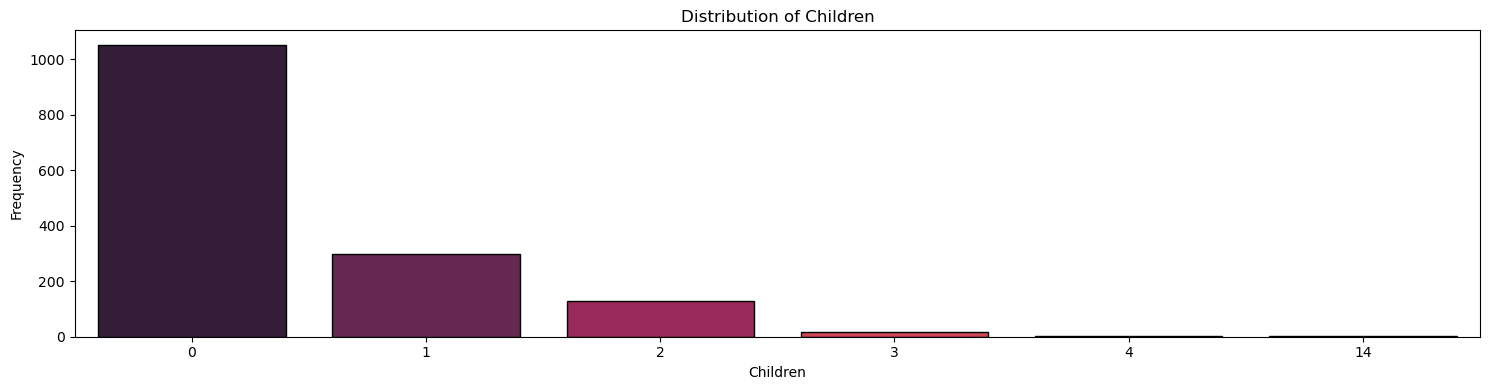

In [21]:
# Children Distribution - Count plot
plt.figure(figsize=(15,4))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Children', data=Credit_data_cleaned, palette='rocket',edgecolor='black')

# Adding Labels and Adjusting layout
plt.title('Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [22]:
# Checking the min and max for xticks
print(Credit_data_cleaned['Annual_income'].min())
print(Credit_data_cleaned['Annual_income'].max())

33750.0
1575000.0


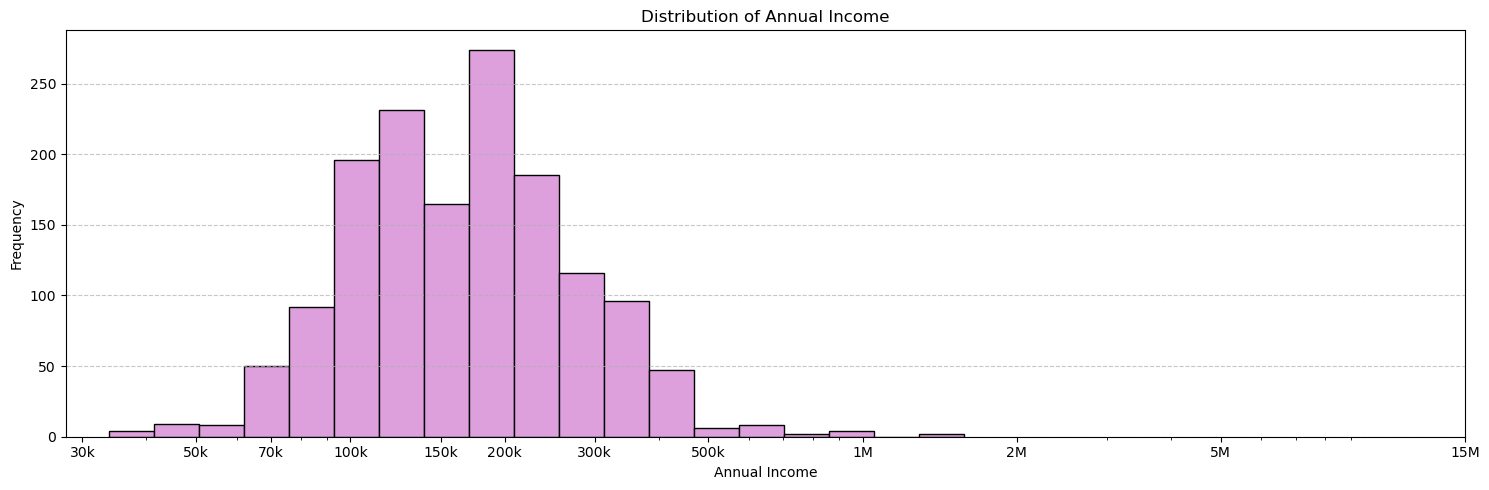

In [23]:
# Annual Income Distribution - Histogram plot
plt.figure(figsize=(15,5))# Plotting a figure with a specified size

# Adding grid lines along the y-axis with a dashed linestyle and reduced transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Extract and store annual income data for Ploting a histogram with a logarithmic scale for the x-axis
annual_income_data = Credit_data_cleaned['Annual_income']

# Plotting Histogram plot
plt.hist(annual_income_data, bins=np.logspace(np.log10(annual_income_data.min()), np.log10(annual_income_data.max()), 20), color='plum', edgecolor='black')
plt.xscale('log')  # Set x-axis to logarithmic scale

# Defining x-tick values and labels for better readability
xtick_values = [3e4, 5e4, 7e4, 1e5, 1.5e5, 2e5, 3e5, 5e5, 1e6, 2e6, 5e6, 1.5e7]
xtick_labels = ['30k', '50k', '70k', '100k', '150k', '200k', '300k', '500k', '1M', '2M', '5M', '15M']
plt.xticks(xtick_values, xtick_labels)

# Adding Labels and Adjusting layout
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

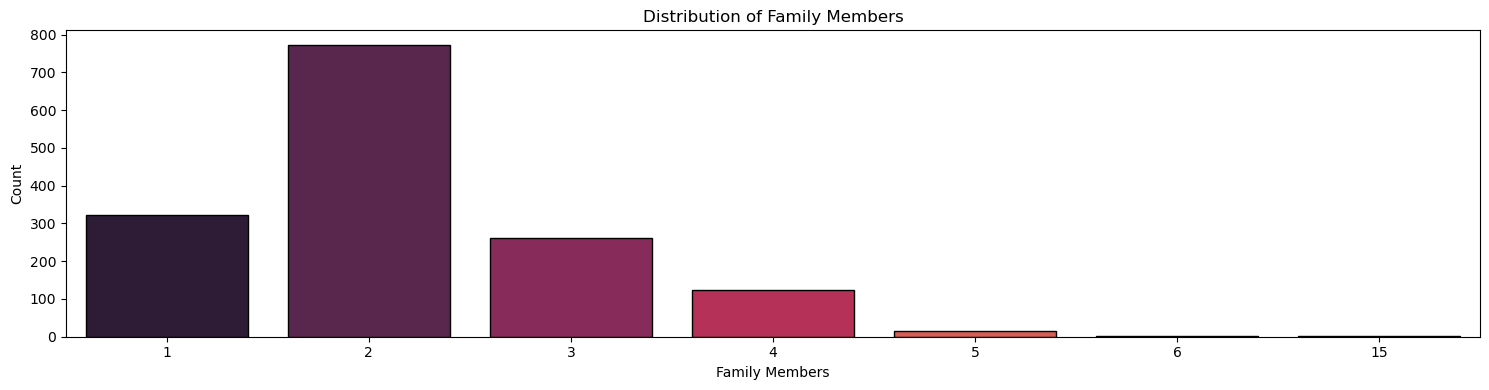

In [24]:
# Family Members Distribution - Count plot
plt.figure(figsize=(15,4))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Family_Members', data=Credit_data_cleaned, palette='rocket',edgecolor='black')

# Adding Labels and Adjusting layout
plt.xlabel('Family Members')
plt.ylabel('Count')
plt.title('Distribution of Family Members')
plt.tight_layout()
plt.show()

## 2.3 Visualization on the Hypothesis

#### Hypothesis 1: Gender, Car Ownership, Property Ownership, and Income Type do not significantly influence target variable (Label).

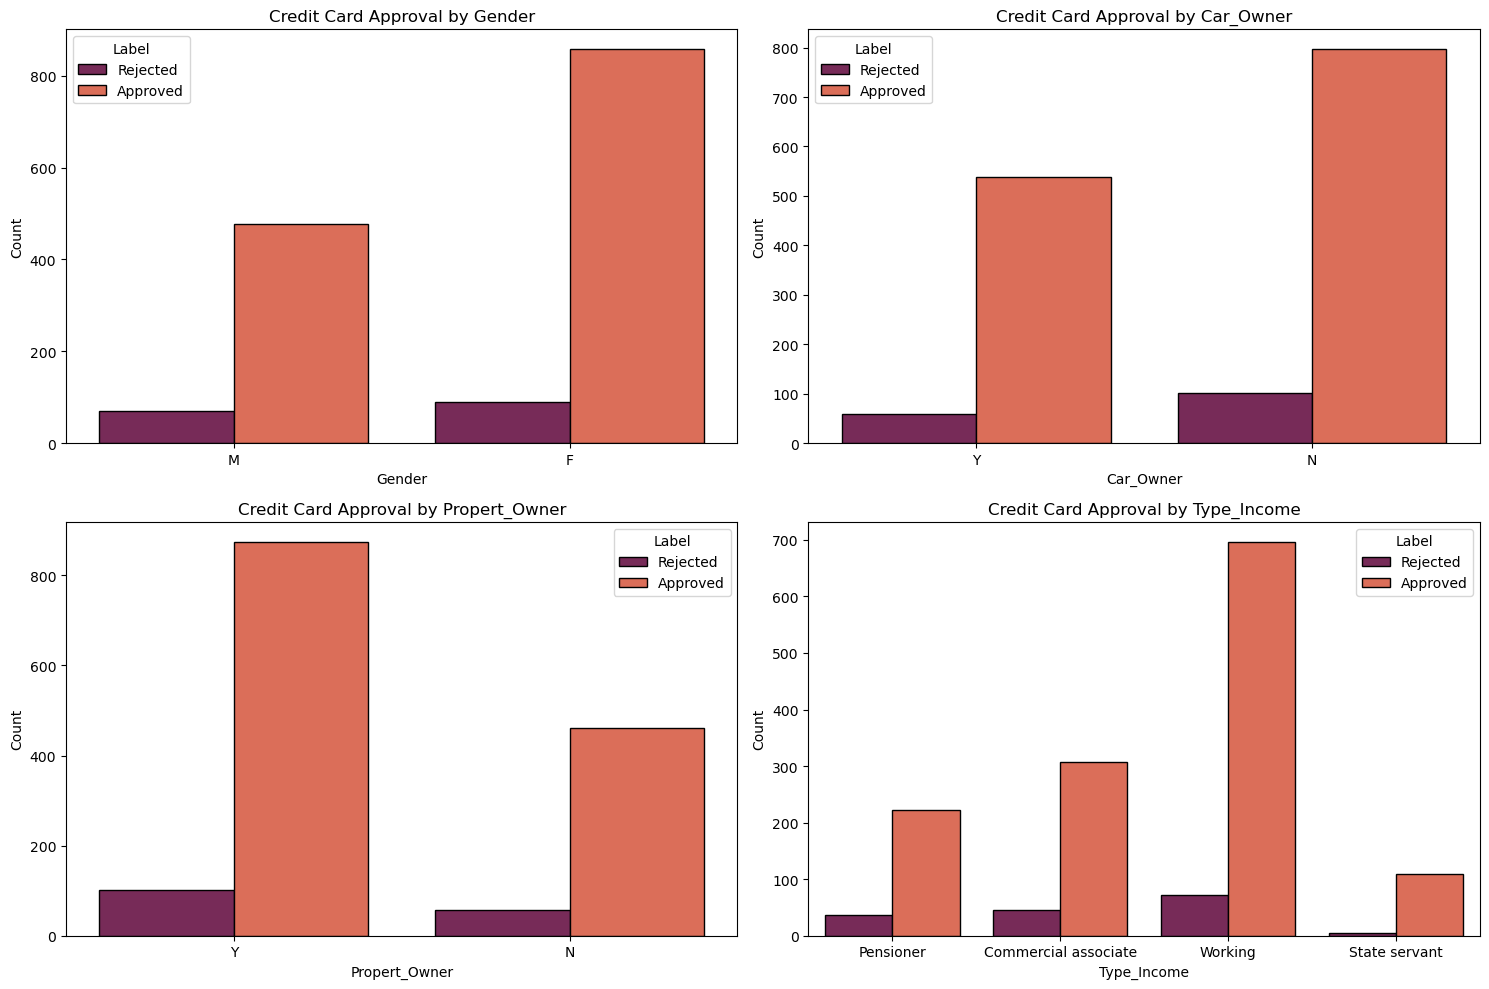

In [25]:
categorical_columns = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Income']

# Creating subplots with 2 rows, 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5 * 2))

axes = axes.flatten()# Flatten the 2x2 array of subplots into a 1D array

# Plotting Count plots for 'Label' with each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='Label', data=Credit_data_cleaned, palette="rocket", edgecolor='black', ax=axes[i])
    
    # Adding labels
    axes[i].set_title(f'Credit Card Approval by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
    # Adding legend
    axes[i].legend(title='Label', loc='best')

# Adjusting layout
plt.tight_layout()
plt.show()

#### Hypothesis 2: Marital status significantly influences the target variable (Label).

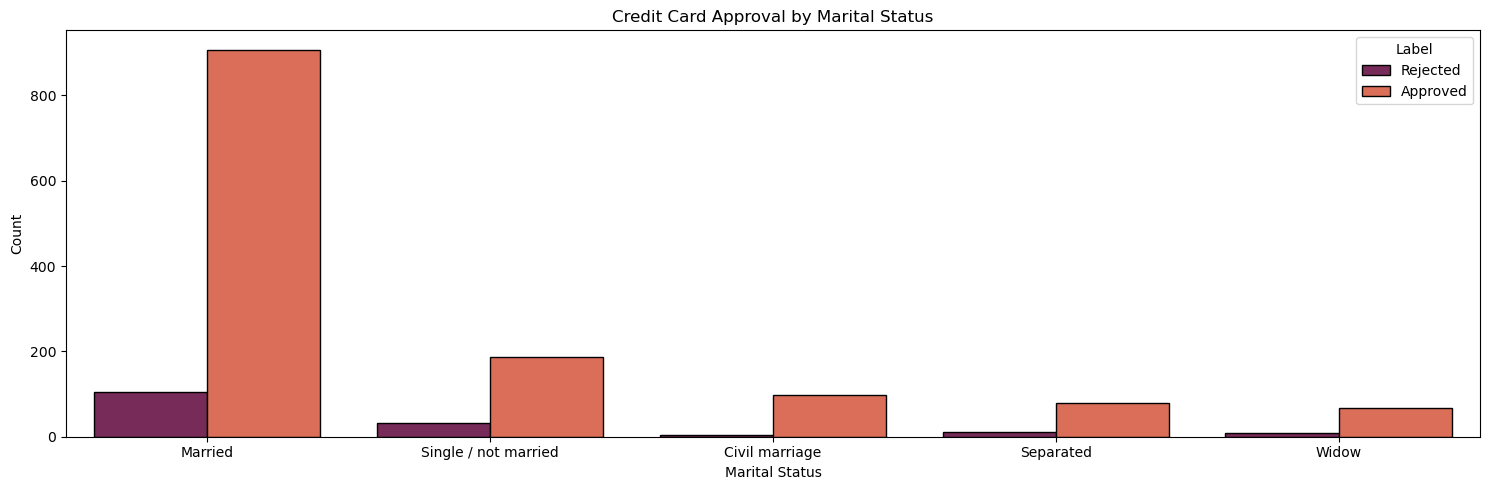

In [26]:
# Distribution of Marital status with respect to Label
plt.figure(figsize=(15, 5))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Marital_status', hue='Label', data=Credit_data_cleaned, palette='rocket',edgecolor='black')

# Adding Title, Labels and Adjusting layout
plt.title('Credit Card Approval by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show() 

#### Hypothesis 3: Housing type does not significantly influence target variable (Label).

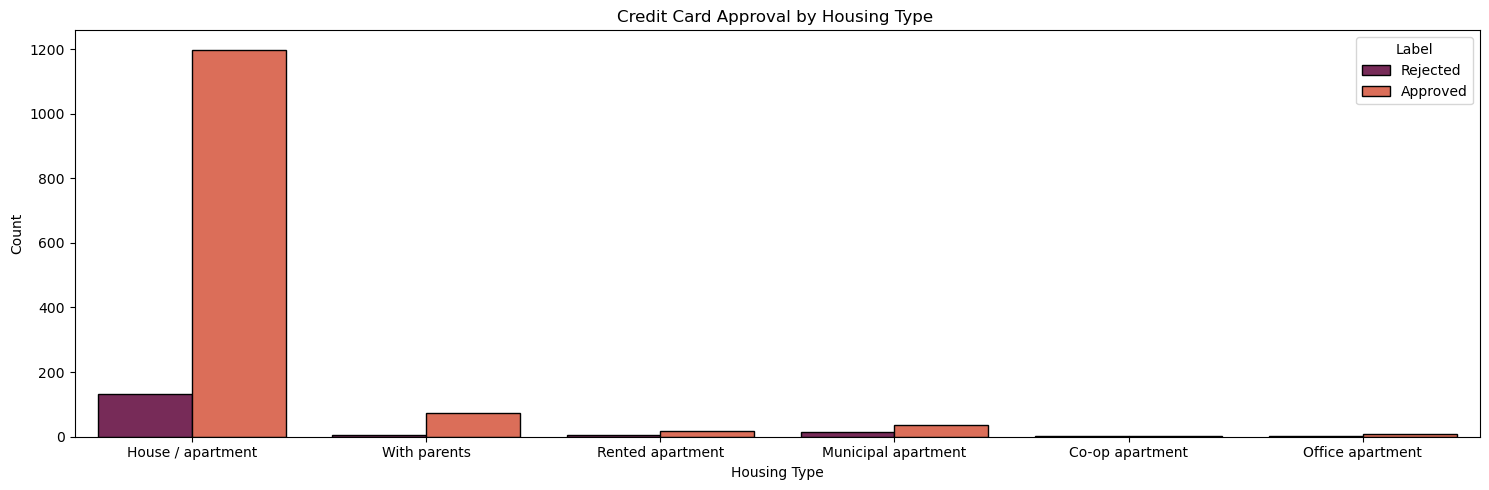

In [27]:
# Distribution of Housing Type with respect to Label
plt.figure(figsize=(15, 5))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Housing_type', hue='Label', data=Credit_data_cleaned, palette='rocket',edgecolor='black')

# Adding Title, Labels and Adjusting layout
plt.title('Credit Card Approval by Housing Type ')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show() 

# 3. Handling Outliers

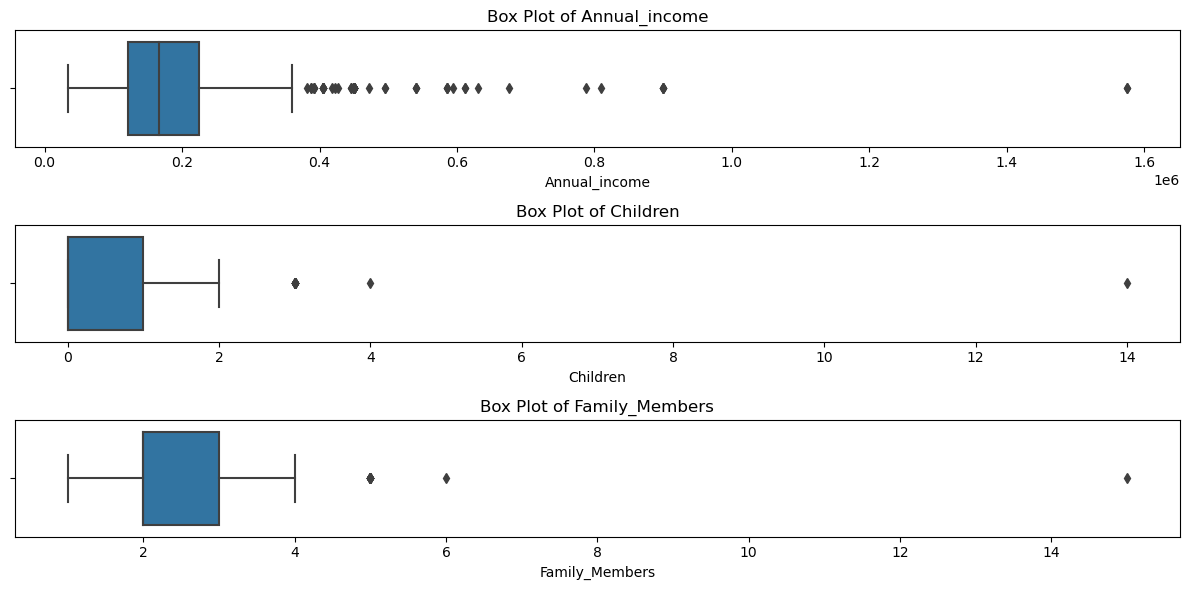

In [28]:
# Defining numerical features to handle outliers
numerical_features = ['Annual_income', 'Children', 'Family_Members']
numerical_data = Credit_data_cleaned[numerical_features]

# Plotting Box plots for each numerical column to check outliers
fig, axes = plt.subplots(nrows=len(numerical_data.columns), figsize=(12, 2 * len(numerical_data.columns)))

# Iterating through each numerical column and plot a boxplot
for i, col in enumerate(numerical_data.columns):
    sns.boxplot(x=numerical_data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjusting layout
plt.tight_layout()
plt.show()

In [29]:
# Identifying and removing outliers in selected columns using the IQR method
columns_to_remove_outliers = ['Annual_income', 'Children', 'Family_Members']

def remove_outliers(data, column): # Function to remove outliers based on Interquartile Range (IQR)
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    # Defining lower and upper bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return data[(column > lower_bound) & (column < upper_bound)] # Returning data without outliers

# Looping through selected columns and removing outliers
for col in columns_to_remove_outliers:
    Credit_data_cleaned = remove_outliers(Credit_data_cleaned, Credit_data_cleaned[col])

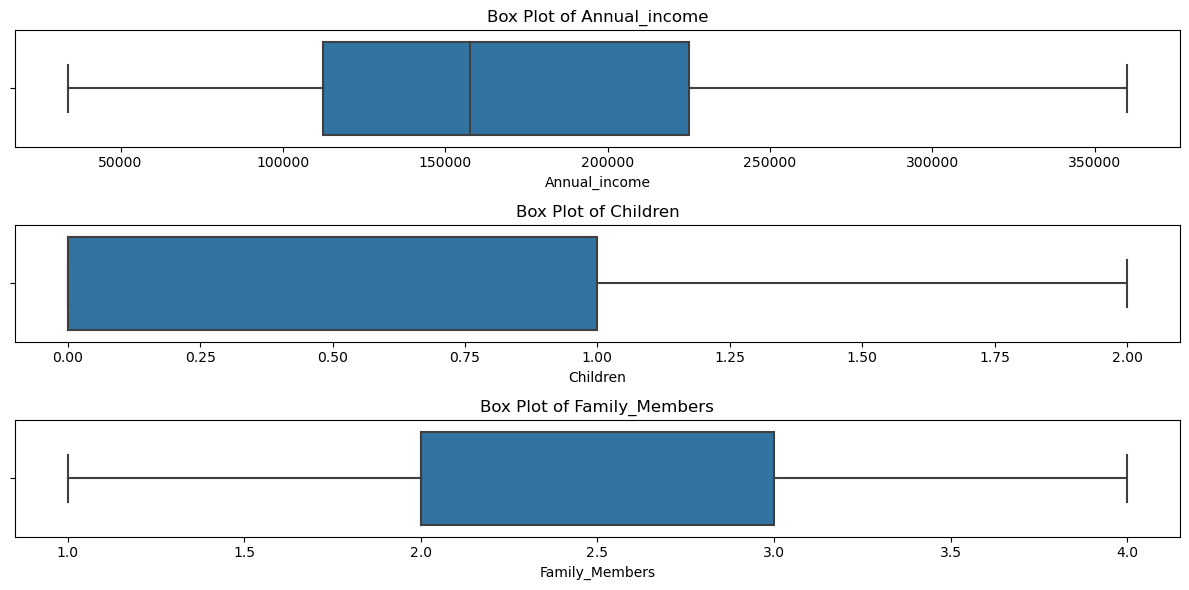

In [30]:
# Defining numerical features to handle outliers
numerical_features = ['Annual_income', 'Children', 'Family_Members']
numerical_data = Credit_data_cleaned[numerical_features]

# Plotting Box plots for each numerical column to check outliers
fig, axes = plt.subplots(nrows=len(numerical_data.columns), figsize=(12, 2 * len(numerical_data.columns)))

# Iterating through each numerical column and plot a boxplot
for i, col in enumerate(numerical_data.columns):
    sns.boxplot(x=numerical_data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjusting layout
plt.tight_layout()
plt.show()

# 4. Feature Engineering (Numerical features)

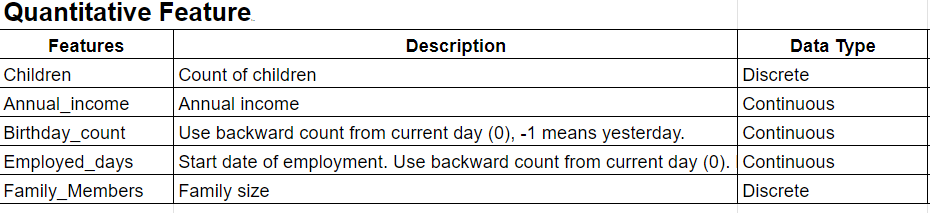

### 4.1 Converting 'Birthday_count' column into 'Birthdate' and 'Age'

In [31]:
# Adding the current date to the Credit Data as 'Current_Date' to calculate the 'Birthdate'
Credit_data_cleaned['Current_Date'] = datetime.now()

# Converting 'Birthday_count' to timedelta and subtract from the current date
Credit_data_cleaned['Birthdate'] = Credit_data_cleaned['Current_Date'] - abs(Credit_data_cleaned['Birthday_count']).apply(lambda x: timedelta(days=x))

# Calculating 'Age' in years based on 'Birthdate' column
Credit_data_cleaned['Age'] = ((Credit_data_cleaned['Current_Date'] - Credit_data_cleaned['Birthdate']).dt.days / 365.25).astype(int)

# Extracting only the date part from 'Birthdate' column
Credit_data_cleaned['Birthdate'] = Credit_data_cleaned['Birthdate'].dt.date


In [32]:
# Displaying the result
Credit_data_cleaned[['Birthdate', 'Age']].head()

,Birthdate,Age
0,1973-06-10,51
1,1987-09-20,37
4,1987-09-20,37
6,1987-09-20,37
7,1964-03-27,60


### 4.2 Converting 'Employed_days' column into 'Employment_startdate' and 'Employed_Years' 

In [33]:
max_employed_days = 365 * 50  # Assuming a maximum employment duration of 50 years

# Converting 'Employed_days' to timedelta and Calculating 'Employment_startdate'
Credit_data_cleaned['Employed_days'] = Credit_data_cleaned['Employed_days'].clip(upper=max_employed_days)
Credit_data_cleaned['Employment_startdate'] = Credit_data_cleaned['Current_Date'] - pd.to_timedelta(Credit_data_cleaned['Employed_days'], unit='D')

# Calculating 'Employed_Years' that gives the difference in years 
Credit_data_cleaned['Employed_Years'] = abs(round((Credit_data_cleaned['Current_Date'] - Credit_data_cleaned['Employment_startdate']).dt.days / 365.25,2))

# Extracting only the date part
Credit_data_cleaned['Employment_startdate'] = Credit_data_cleaned['Employment_startdate'].dt.date

In [34]:
# Displaying the result
Credit_data_cleaned[['Employment_startdate','Employed_Years']].head()

,Employment_startdate,Employed_Years
0,1974-11-14,49.97
1,2026-06-10,1.60
4,2026-06-10,1.60
6,2026-06-10,1.60
7,1974-11-14,49.97


In [35]:
# Dropping 'Current_Date', 'Birthday_count' and 'Employed_days' columns
Credit_data_cleaned = Credit_data_cleaned.drop(['Current_Date','Birthday_count','Employed_days'], axis=1)

### 4.3  Binning and Discretization 
- Using on newly created column 'Age' to create 'Age_Category' column

In [36]:
# Checking values for creating bins for 'Age' column
Credit_data_cleaned['Age'].unique()

array([51, 37, 60, 46, 35, 32, 48, 33, 43, 59, 29, 55, 57, 65, 52, 63, 42,
       30, 50, 31, 26, 28, 49, 44, 45, 67, 64, 24, 41, 38, 39, 34, 47, 54,
       62, 53, 58, 27, 56, 66, 40, 36, 23, 22, 25, 61, 68, 21])

In [37]:
# Creating bins and labels for 'Age' category
bins = [20, 40, 60, 70]
labels = ['Young', 'Adult', 'Senior'] # 'Young' (20-39), 'Adult' (40-59), and 'Senior' (60-69)

# Apply binning to the 'Age' column
Credit_data_cleaned['Age_Category'] = pd.cut(Credit_data_cleaned['Age'], bins=bins, labels=labels, right=False)

# Displaying the result
print(Credit_data_cleaned[['Age', 'Age_Category']].head(10))

    Age Age_Category
0    51        Adult
1    37        Young
4    37        Young
6    37        Young
7    60       Senior
11   51        Adult
13   51        Adult
15   46        Adult
16   46        Adult
17   51        Adult


### 4.4 Removing outliers of newly created columns 'Employed_Years' & 'Age'

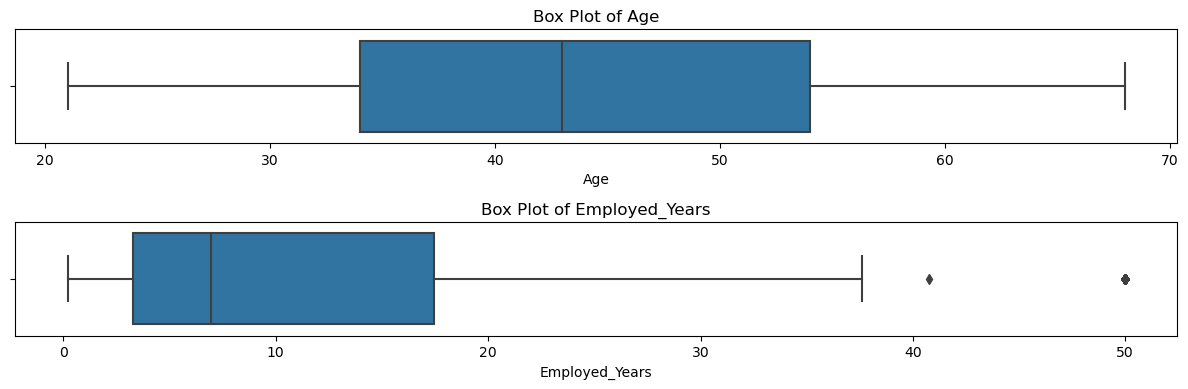

In [38]:
# Defining numerical features to handle outliers
numerical_features = [ 'Age', 'Employed_Years']
numerical_data = Credit_data_cleaned[numerical_features]

# Plotting Box plots for each numerical column to check outliers
fig, axes = plt.subplots(nrows=len(numerical_data.columns), figsize=(12, 2 * len(numerical_data.columns)))

# Iterating through each numerical column and plot a boxplot
for i, col in enumerate(numerical_data.columns):
    sns.boxplot(x=numerical_data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    
# Adjusting layout
plt.tight_layout()
plt.show()

In [39]:
# Identifying and removing outliers in selected columns using the IQR method
columns_to_remove_outliers = numerical_features = [ 'Age', 'Employed_Years']

def remove_outliers(data, column): # Function to remove outliers based on Interquartile Range (IQR)
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    # Defining lower and upper bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return data[(column > lower_bound) & (column < upper_bound)] # Returning data without outliers

# Looping through selected columns and removing outliers
i = 0
for i in range(5):
    for col in columns_to_remove_outliers:
        Credit_data_cleaned = remove_outliers(Credit_data_cleaned, Credit_data_cleaned[col])

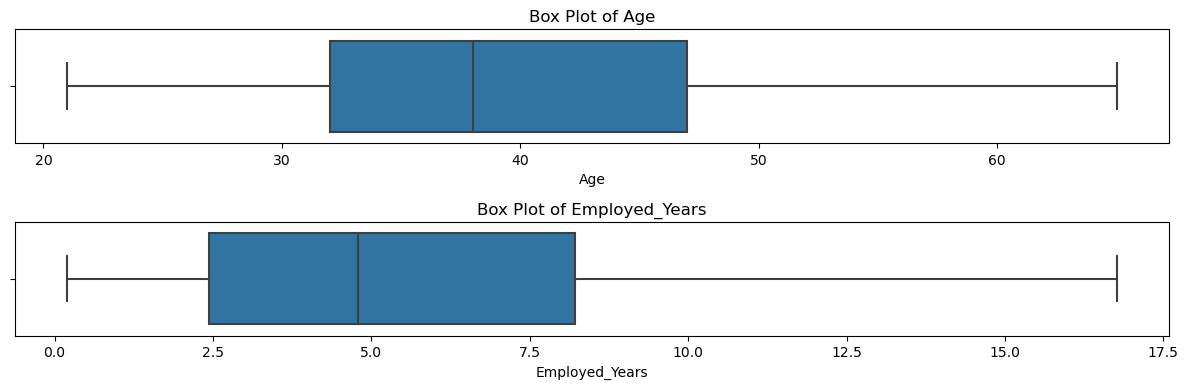

In [40]:
# Defining numerical features to handle outliers
numerical_features = [ 'Age', 'Employed_Years']
numerical_data = Credit_data_cleaned[numerical_features]

# Plotting Box plots for each numerical column to check outliers
fig, axes = plt.subplots(nrows=len(numerical_data.columns), figsize=(12, 2 * len(numerical_data.columns)))

# Iterating through each numerical column and plot a boxplot
for i, col in enumerate(numerical_data.columns):
    sns.boxplot(x=numerical_data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    
# Adjusting layout
plt.tight_layout()
plt.show()

- While running this code it seems like there is a issue, which is to remove the ouliers in "Employed_Years" column we have to run the code atleast 4 times so that's why i have looped it over 4. 
- The reason for this might be that changing the "Credit_data_cleaned" data while going through the columns to eliminate outliers could cause alterations in other columns.

### 4.5 EDA on 'Age_Category' column

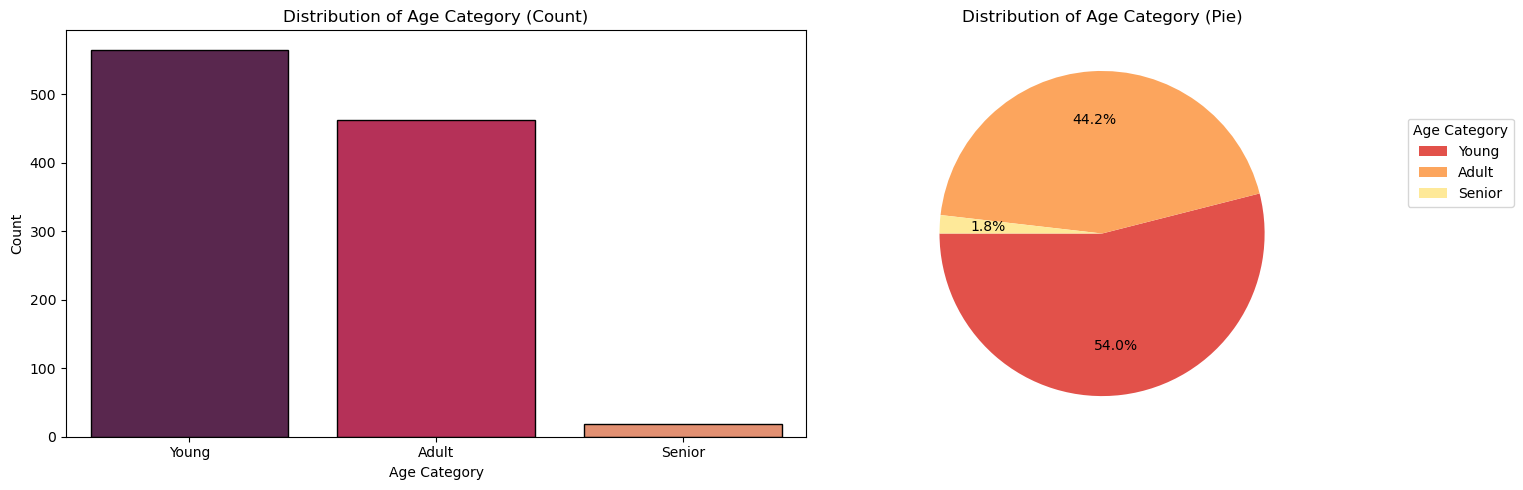

In [41]:
# Distribution of Age Category - Count plot and Pie chart
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting Count plot
sns.countplot(x='Age_Category', data=Credit_data_cleaned, ax=axes[0], palette='rocket',edgecolor='black')
axes[0].set_title('Distribution of Age Category (Count)')

# Plotting Pie chart
Age_Category_counts = Credit_data_cleaned['Age_Category'].value_counts()
wedges, _, autotexts = axes[1].pie(Age_Category_counts, autopct='%1.1f%%', startangle=180,pctdistance = 0.7, colors=sns.color_palette('Spectral'))

# Adding legend to the pie chart
axes[1].legend(wedges, Age_Category_counts.index, title='Age Category', loc='upper right',bbox_to_anchor=(1.13, 0.5, 0.4, 0.3))
axes[1].set_title('Distribution of Age Category (Pie)')

# Adjusting layout
axes[0].set_xlabel('Age Category')
axes[0].set_ylabel('Count')
plt.tight_layout()
plt.show()


### 4.6 Plottingg the Hypothesis
#### Hypothesis 4: Age Category do not significantly impact the target variable (Label).

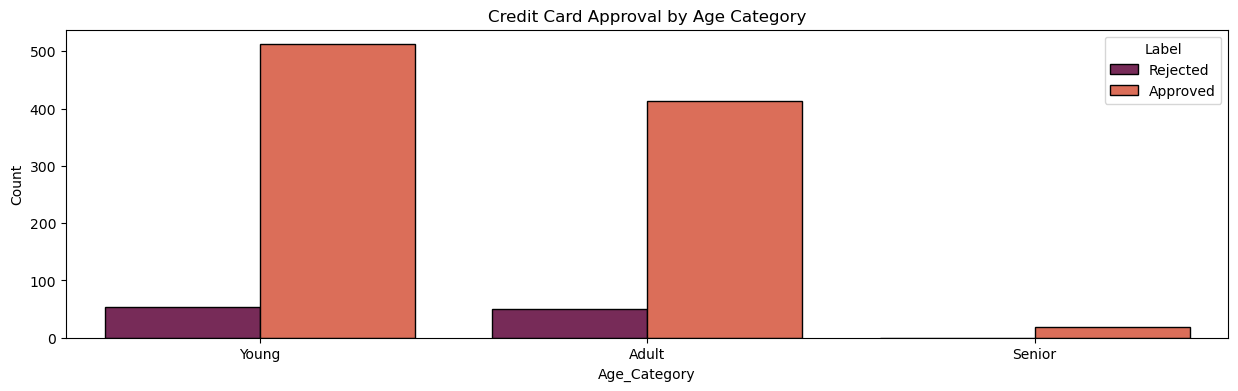

In [42]:
plt.figure(figsize=(15,4))# Plotting a figure with a specified size

# Plotting Count plot
sns.countplot(x='Age_Category', hue='Label', data=Credit_data_cleaned, palette='rocket', edgecolor='black')

# Adding Labels and Adjusting layout
plt.title('Credit Card Approval by Age Category')
plt.xlabel('Age_Category')
plt.ylabel('Count')
plt.legend(title='Label', loc='upper right')
plt.show()

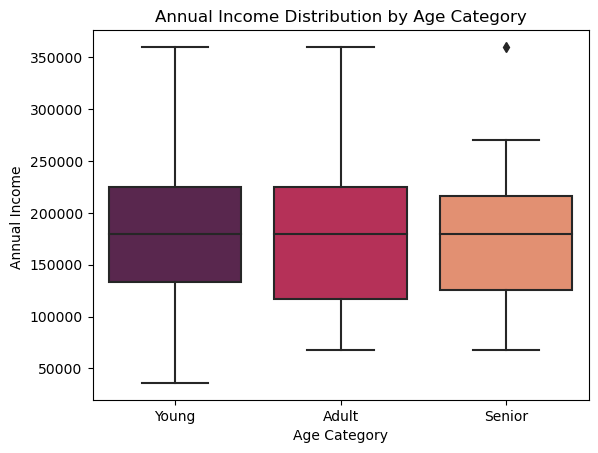

In [43]:
# Annual Income by Age Category - Box plot
sns.boxplot(x='Age_Category', y='Annual_income', data=Credit_data_cleaned, palette='rocket')

# Adding Labels and Adjusting layout
plt.title('Annual Income Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Annual Income ')
plt.show()

# 5. Correlation 
Using Pearson Correlation

## 5.1 Pearson Correlation Coefficient 

In [44]:
# Defining numerical features for correlation
numerical_features = ['Annual_income', 'Children', 'Age', 'Employed_Years', 'Family_Members']

# 'correlation_df' DataFrame to store correlation coefficients
correlation_df = pd.DataFrame(index=numerical_features, columns=numerical_features)

# Performing correlation tests 
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        var1 = numerical_features[i]
        var2 = numerical_features[j]
        
        # Filing the 'correlation_df' with correlation coefficients
        correlation_coefficient, _ = pearsonr(Credit_data_cleaned[var1], Credit_data_cleaned[var2])
        correlation_df.at[var1, var2] = correlation_coefficient
        correlation_df.at[var2, var1] = correlation_coefficient

# Displaying the results
correlation_df

,Annual_income,Children,Age,Employed_Years,Family_Members
Annual_income,NaN,-0.003508,0.046686,0.106606,0.00867
Children,-0.003508,NaN,-0.214077,0.030786,0.881755
Age,0.046686,-0.214077,NaN,0.177849,-0.158023
Employed_Years,0.106606,0.030786,0.177849,NaN,0.053566
Family_Members,0.00867,0.881755,-0.158023,0.053566,NaN


### 5.1.1 Plotting correlation matrix Using HeatMap

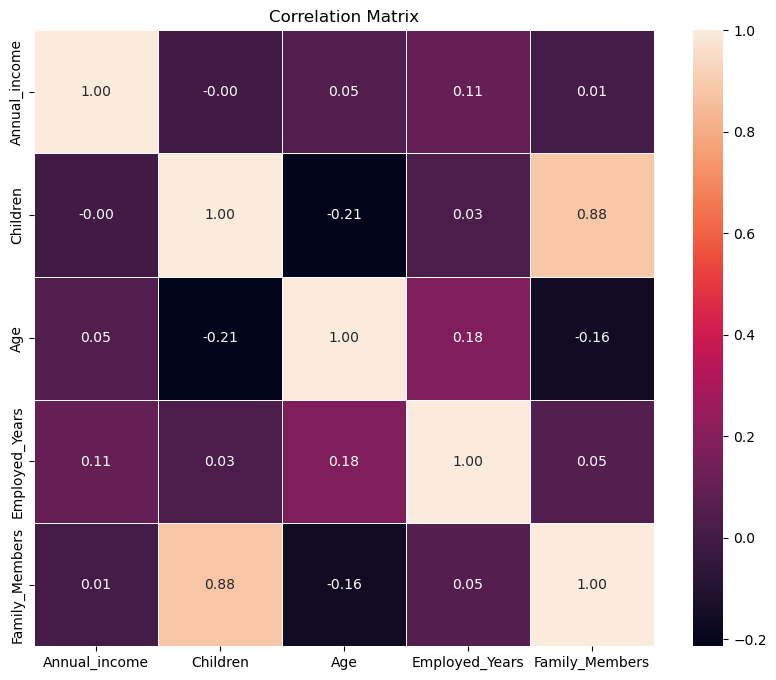

In [45]:
# Creating a subset DataFrame with only numerical variables
numerical_data = Credit_data_cleaned[numerical_features]

# Calculating correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## 5.2 Justifying Hypothesis with p_values

In [46]:
# Defining numerical features for correlation
numerical_features = ['Annual_income', 'Children', 'Age', 'Employed_Years', 'Family_Members']

# Creating an 'p_value_df' DataFrame to store p-values
p_value_df = pd.DataFrame(index=numerical_features, columns=numerical_features)

# Performing correlation tests 
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        var1 = numerical_features[i]
        var2 = numerical_features[j]
        
        # Filling the 'p_value_df' with p-values
        _, p_value = pearsonr(Credit_data_cleaned[var1], Credit_data_cleaned[var2])
        p_value_df.at[var1, var2] = round(p_value,2)
        p_value_df.at[var2, var1] = round(p_value,2)

# Displaying the results
p_value_df

,Annual_income,Children,Age,Employed_Years,Family_Members
Annual_income,NaN,0.91,0.13,0.0,0.78
Children,0.91,NaN,0.0,0.32,0.0
Age,0.13,0.0,NaN,0.0,0.0
Employed_Years,0.0,0.32,0.0,NaN,0.08
Family_Members,0.78,0.0,0.0,0.08,NaN


#### 1. Annual Income Analysis:

- **Hypothesis 1:** There is no significant correlation between annual income and the number of children.
    - **Conclusion:** Fail to reject the null hypothesis (p-value = 0.91); no significant evidence of correlation.


- **Hypothesis 2:** There is a significant correlation between annual income and age.
    - **Conclusion:** Reject the null hypothesis (p-value = 0.13); some evidence of correlation, but not highly significant.


- **Hypothesis 3:** There is a significant correlation between annual income and employed years.
    - **Conclusion:** Reject the null hypothesis (p-value = 0.0); strong evidence of correlation.


- **Hypothesis 4:** There is no significant correlation between annual income and the number of family members.
    - **Conclusion:** Fail to reject the null hypothesis (p-value = 0.78); no significant evidence of correlation.

#### 2. Age Analysis:

- **Hypothesis 5:** There is a significant correlation between the number of children and age.
    - **Conclusion:** Reject the null hypothesis (p-value = 0.0); strong evidence of correlation.


- **Hypothesis 6:** Age and employed years are significantly correlated.
    - **Conclusion:** Reject the null hypothesis (p-value = 0.0); strong evidence of correlation.


- **Hypothesis 7:** There is a significant correlation between age and the number of family members.
    - **Conclusion:** Reject the null hypothesis (p-value = 0.0); strong evidence of correlation.

#### 3. Employment Analysis:

- **Hypothesis 8:** Employed years and the number of family members do not have a significant correlation.
    - **Conclusion:** Fail to reject the null hypothesis (p-value = 0.08); no significant evidence of correlation.

#### Summary:

- Annual income is significantly correlated with employed years but not significantly correlated with the number of children, age, or the number of family members.

- Age is significantly correlated with the number of children, employed years, and the number of family members.

- Employed years and the number of family members do not have a significant correlation.

In [47]:
Credit_data_cleaned = Credit_data_cleaned.drop(['Birthdate','Employment_startdate'], axis=1)

# 6. Feature Engineering (Categorical features)

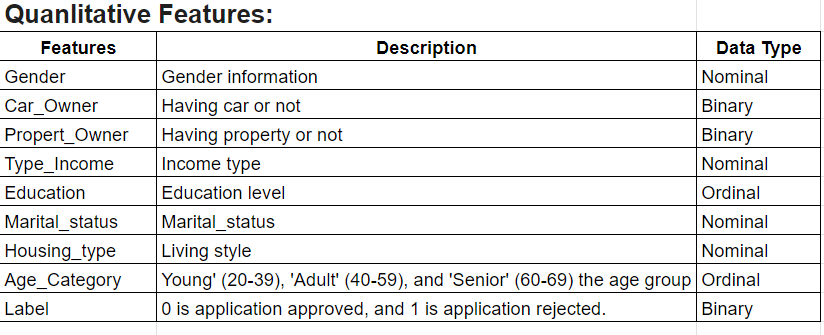

In [48]:
# Defining categorical features for displaying unique values for each categorical column
categorical_features = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Education', 'Marital_status', 'Housing_type','Age_Category', 'Label']
categorical_data = Credit_data_cleaned[categorical_features]

for column in categorical_data.columns:
    unique_values = categorical_data[column].unique()
    print(f"Unique values in {column}:", unique_values)
    print()

Unique values in Gender: ['F' 'M']

Unique values in Car_Owner: ['Y' 'N']

Unique values in Propert_Owner: ['N' 'Y']

Unique values in Type_Income: ['Commercial associate' 'Working' 'Pensioner' 'State servant']

Unique values in Education: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']

Unique values in Marital_status: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Unique values in Housing_type: ['House / apartment' 'Rented apartment' 'With parents' 'Co-op apartment'
 'Municipal apartment' 'Office apartment']

Unique values in Age_Category: ['Young', 'Adult', 'Senior']
Categories (3, object): ['Young' < 'Adult' < 'Senior']

Unique values in Label: ['Rejected' 'Approved']



### 6.1 Combining Categories 
Of 'Education', 'Marital_status' and 'Housing_type' columns for clean data

In [49]:
# Combining categories in Education
Credit_data_cleaned['Education'] = Credit_data_cleaned['Education'].replace({
    'Secondary / secondary special': 'Secondary Education',
    'Incomplete higher': 'Secondary Education'
})

# Combining categories in Marital_status
Credit_data_cleaned['Marital_status'] = Credit_data_cleaned['Marital_status'].replace({
    'Married': 'Married',
    'Civil marriage': 'Married',
    'Single / not married': 'Single',
    'Separated': 'Single',
    'Widow':'Widow'
})
Credit_data_cleaned['Housing_type'] = Credit_data_cleaned['Housing_type'].replace({
    'House / apartment': 'Apartment',
    'Rented apartment': 'Rented',
    'With parents': 'With parents',
    'Co-op apartment': 'Apartment',
    'Municipal apartment': 'Apartment',
    'Office apartment': 'Apartment'
})

# Display the results
print(Credit_data_cleaned[['Education', 'Marital_status','Housing_type']].head())

# Saved the data to a csv to use for sql queries
Credit_data_cleaned.to_csv('Credit_data_cleaned_SQL.csv', index=False)

              Education Marital_status Housing_type
1      Higher education        Married    Apartment
4      Higher education        Married    Apartment
6      Higher education        Married    Apartment
11  Secondary Education        Married    Apartment
13  Secondary Education        Married    Apartment


In [50]:
Credit_data_cleaned.columns

Index(['Ind_ID', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Family_Members', 'Label', 'Age', 'Employed_Years',
       'Age_Category'],
      dtype='object')

## 6.2 Encoding Categorical Features
Using LabelEncoder

In [51]:
# Defining categorical features for Label Encoding
categorical_columns = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Education', 'Marital_status','Age_Category', 'Housing_type','Label']

label_encoder = LabelEncoder() # Initializing LabelEncoder
label_mappings = {} # Dictionary to store label mappings

# Looping through each categorical column for label encoding
for col in categorical_columns:
    Credit_data_cleaned[col] = label_encoder.fit_transform(Credit_data_cleaned[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the label mappings for each categorical column
for col, mapping in label_mappings.items():
    print(f"{col} Label Mapping:")
    print(mapping)
    print()

Gender Label Mapping:
{'F': 0, 'M': 1}

Car_Owner Label Mapping:
{'N': 0, 'Y': 1}

Propert_Owner Label Mapping:
{'N': 0, 'Y': 1}

Type_Income Label Mapping:
{'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Working': 3}

Education Label Mapping:
{'Academic degree': 0, 'Higher education': 1, 'Lower secondary': 2, 'Secondary Education': 3}

Marital_status Label Mapping:
{'Married': 0, 'Single': 1, 'Widow': 2}

Age_Category Label Mapping:
{'Adult': 0, 'Senior': 1, 'Young': 2}

Housing_type Label Mapping:
{'Apartment': 0, 'Rented': 1, 'With parents': 2}

Label Label Mapping:
{'Approved': 0, 'Rejected': 1}



# 7. Association 
Using Chi_squared Test

In [52]:
# Defining categorical features for Chi_squared Test¶ Analysis
categorical_features = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Education', 'Marital_status','Age_Category', 'Housing_type','Label']

# Creating 'p_value_df_categorical' DataFrame to store p-values
p_value_df_categorical = pd.DataFrame(index=categorical_features, columns=categorical_features)

for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        var1 = categorical_features[i]
        var2 = categorical_features[j]

        # Creating a contingency table
        contingency_table = pd.crosstab(Credit_data_cleaned[var1], Credit_data_cleaned[var2])

        # Performing Chi-square tests
        _, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Filling the DataFrame with p-values
        p_value_df_categorical.at[var1, var2] = round(p_value,2)
        p_value_df_categorical.at[var2, var1] = round(p_value,2)

# Displaying the results
p_value_df_categorical

,Gender,Car_Owner,Propert_Owner,Type_Income,Education,Marital_status,Age_Category,Housing_type,Label
Gender,NaN,0.0,0.09,0.95,0.81,0.0,0.03,0.02,0.16
Car_Owner,0.0,NaN,0.69,0.46,0.0,0.0,0.02,0.84,0.91
Propert_Owner,0.09,0.69,NaN,0.41,0.09,0.73,0.07,0.0,0.51
Type_Income,0.95,0.46,0.41,NaN,0.0,0.16,0.27,0.96,0.0
Education,0.81,0.0,0.09,0.0,NaN,0.02,0.01,0.0,0.01
Marital_status,0.0,0.0,0.73,0.16,0.02,NaN,0.08,0.86,0.03
Age_Category,0.03,0.02,0.07,0.27,0.01,0.08,NaN,0.0,0.26
Housing_type,0.02,0.84,0.0,0.96,0.0,0.86,0.0,NaN,0.1
Label,0.16,0.91,0.51,0.0,0.01,0.03,0.26,0.1,NaN


#### Hypothesis 1: Gender, Car Ownership, Property Ownership, and Income Type do not significantly influence the target variable (Label).
- **Gender:**
   - **P-value:** 0.16
   - **Conclusion:** Fail to reject the null hypothesis. No significant evidence that gender influences the target variable.


- **Car Ownership:**
   - **P-value:** 0.91
   - **Conclusion:** Fail to reject the null hypothesis. No significant evidence that car ownership influences the target variable.


- **Property Ownership:**
   - **P-value:** 0.51
   - **Conclusion:** Fail to reject the null hypothesis. No significant evidence that property ownership influences the target variable.


- **Income Type:**
   - **P-value:** 0.0
   - **Conclusion:** Reject the null hypothesis. Significant evidence that income type influences the target variable.

#### Hypothesis 2: Marital status significantly influences the target variable (Label).
- **Marital Status:**
  - **P-value:** 0.03
  - **Conclusion:** Reject the null hypothesis. Significant evidence that marital status influences the target variable.

#### Hypothesis 3: Housing type does not significantly influence the target variable (Label).
- **Housing Type:**
  - **P-value: 0.1**
  - **Conclusion:** Fail to reject the null hypothesis. No significant evidence that housing type influences the target variable.

#### Hypothesis 4:Age Category do not significantly impact the target variable (Label).
- **Age Category:**
  - **P-value:** 0.26
  - **Conclusion:** Fail to reject the null hypothesis. No significant evidence that age category influences the target variable.

### Summary:
  - Significant evidence that 'Income Type' and 'Marital Status' impact the target variable 'Label.'
  - No significant evidence that 'Gender,' 'Car Ownership,' 'Property Ownership,' 'Housing Type,' and 'Age Category' influence the target variable.

In [53]:
# Dropping 'Children' and 'Family_Members' have a p-value close is to 1 so no significant correlation
Credit_data_cleaned = Credit_data_cleaned.drop(['Children','Family_Members'], axis=1)

# 8. Z-Test 

In [54]:
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Define categorical and numerical variables
categorical_variables = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Marital_status', 'Housing_type', 'Age_Category']
numerical_variables = ['Annual_income', 'Age', 'Employed_Years']

# Set the significance level
significance_level = 0.05

# Perform t-tests for numerical variables
for column in numerical_variables:
    approved = Credit_data_cleaned[Credit_data_cleaned['Label'] == 0][column]
    rejected = Credit_data_cleaned[Credit_data_cleaned['Label'] == 1][column]

    t_stat, p_value = ttest_ind(approved, rejected, equal_var=False)

    print(f"T-test for {column} - t-statistic: {t_stat:.2f}, p-value: {p_value:.2f}")

    if p_value < significance_level:
        print(f"Reject the null hypothesis for {column} - There is a significant difference in means.")
        print()
    else:
        print(f"Fail to reject the null hypothesis for {column} - There is no significant difference in means.")
        print()

# Perform z-tests for categorical variables
for column in categorical_variables:
    approved_count = Credit_data_cleaned[Credit_data_cleaned['Label'] == 0][column].sum()
    rejected_count = Credit_data_cleaned[Credit_data_cleaned['Label'] == 1][column].sum()

    total_approved = len(Credit_data_cleaned[Credit_data_cleaned['Label'] == 0])
    total_rejected = len(Credit_data_cleaned[Credit_data_cleaned['Label'] == 1])

    z_stat, p_value = proportions_ztest([approved_count, rejected_count], [total_approved, total_rejected])

    print(f"Z-test for {column} - z-statistic: {z_stat:.2f}, p-value: {p_value:.2f}")

    if p_value < significance_level:
        print(f"Reject the null hypothesis for {column} - There is a significant difference in approval rates.")
        print()
    else:
        print(f"Fail to reject the null hypothesis for {column} - There is no significant difference in approval rates.")
        print()


T-test for Annual_income - t-statistic: 2.20, p-value: 0.03
Reject the null hypothesis for Annual_income - There is a significant difference in means.

T-test for Age - t-statistic: -1.81, p-value: 0.07
Fail to reject the null hypothesis for Age - There is no significant difference in means.

T-test for Employed_Years - t-statistic: 4.05, p-value: 0.00
Reject the null hypothesis for Employed_Years - There is a significant difference in means.

Z-test for Gender - z-statistic: -1.50, p-value: 0.13
Fail to reject the null hypothesis for Gender - There is no significant difference in approval rates.

Z-test for Car_Owner - z-statistic: -0.22, p-value: 0.83
Fail to reject the null hypothesis for Car_Owner - There is no significant difference in approval rates.

Z-test for Propert_Owner - z-statistic: -0.76, p-value: 0.44
Fail to reject the null hypothesis for Propert_Owner - There is no significant difference in approval rates.

Z-test for Type_Income - z-statistic: nan, p-value: nan
Fail 

# 9. Feature Selection 
Using **RFE (Recursive Feature Elimination)** and **Feature Importance** with Random Forest Classifier

In [55]:
# Defining categorical features for feature selection and target variable
features = ['Gender', 'Car_Owner', 'Propert_Owner', 'Annual_income', 'Type_Income','Education', 
            'Marital_status', 'Housing_type', 'Age','Employed_Years', 'Age_Category']
target = 'Label'

X = Credit_data_cleaned[features]
y = Credit_data_cleaned[target]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9.1 RFE (Recursive Feature Elimination) 

In [56]:
model = RandomForestClassifier(n_estimators=100) # Initializing Random Forest Classifier 
rfe = RFE(model, n_features_to_select=1)  # Recursive Feature Elimination with Random Forest
fit = rfe.fit(X_train, y_train)  # Fitting RFE to the training data

# Displaying RFE ranking of features and sorting it by rank
for feature, rank in sorted(zip(features, fit.ranking_), key=lambda x: x[1]):
    print(f"{feature}: {rank}")

Employed_Years: 1
Age: 2
Annual_income: 3
Type_Income: 4
Marital_status: 5
Education: 6
Gender: 7
Car_Owner: 8
Propert_Owner: 9
Housing_type: 10
Age_Category: 11


## 9.2 Feature Importance 

In [57]:
model_rf = RandomForestClassifier(n_estimators=100) # Initializing Random Forest Classifier 
model_rf.fit(X_train, y_train) # Fitting RFE to the training data

# Displaying the feature importance from the trained Random Forest model
for feature, importance in zip(features, model_rf.feature_importances_):
    print(f"{feature}: {importance:.2f}")

Gender: 0.04
Car_Owner: 0.03
Propert_Owner: 0.04
Annual_income: 0.18
Type_Income: 0.06
Education: 0.05
Marital_status: 0.05
Housing_type: 0.03
Age: 0.20
Employed_Years: 0.29
Age_Category: 0.03


In [58]:
columns = ['Employed_Years', 'Annual_income', 'Age', 'Type_Income', 'Education', 'Marital_status']
Credit_data_cleaned = Credit_data_cleaned

In [59]:
Credit_data_cleaned.to_csv('Credit_data_cleaned_ML.csv', index=False)

- Saved the data to a csv to use it in the Notebook-2 Model Training file for building model predictions for credit card approval.